In [2]:
#dependencies
import pandas as pd
import numpy as np

In [3]:
#read in the cleaned file

filepath="olympics_df.csv"
olympics_df=pd.read_csv(filepath)
olympics_df.head()

,ID,Name,Sex,Age,Height,Weight,NOC,Region,Medal,Sport,Event,Year,Season,City
0,107607,Fritz Richard Gustav Schuft,M,19.0,NaN,NaN,GER,Germany,NaN,Gymnastics,Gymnastics Men's Pommelled Horse,1896,Summer,Athina
1,4493,Antelothanasis,M,NaN,NaN,NaN,GRE,Greece,NaN,Shooting,"Shooting Men's Free Rifle, Three Positions, 30...",1896,Summer,Athina
2,122526,Pierre Alexandre Tuffri,M,19.0,NaN,NaN,FRA,France,Silver,Athletics,Athletics Men's Triple Jump,1896,Summer,Athina
3,122526,Pierre Alexandre Tuffri,M,19.0,NaN,NaN,FRA,France,NaN,Athletics,Athletics Men's Long Jump,1896,Summer,Athina
4,12563,Conrad Helmut Fritz Bcker,M,25.0,NaN,NaN,GER,Germany,NaN,Gymnastics,Gymnastics Men's Horse Vault,1896,Summer,Athina


In [4]:
#add 3 medal columns for Gold, Silver, and Bronze...

olympicsMedals=olympics_df
olympicsMedals["Gold"]=[1 if x=="Gold" else 0 for x in olympicsMedals.Medal]
olympicsMedals["Silver"]=[1 if x=="Silver" else 0 for x in olympicsMedals.Medal]
olympicsMedals["Bronze"]=[1 if x=="Bronze" else 0 for x in olympicsMedals.Medal]

#...and 1 extra medal column that can be counted later
olympicsMedals["MedalCount"]=[0 if pd.isnull(x) else 1 for x in olympics_df.Medal]

olympicsMedals.head()

,ID,Name,Sex,Age,Height,Weight,NOC,Region,Medal,Sport,Event,Year,Season,City,Gold,Silver,Bronze,MedalCount
0,107607,Fritz Richard Gustav Schuft,M,19.0,NaN,NaN,GER,Germany,NaN,Gymnastics,Gymnastics Men's Pommelled Horse,1896,Summer,Athina,0,0,0,0
1,4493,Antelothanasis,M,NaN,NaN,NaN,GRE,Greece,NaN,Shooting,"Shooting Men's Free Rifle, Three Positions, 30...",1896,Summer,Athina,0,0,0,0
2,122526,Pierre Alexandre Tuffri,M,19.0,NaN,NaN,FRA,France,Silver,Athletics,Athletics Men's Triple Jump,1896,Summer,Athina,0,1,0,1
3,122526,Pierre Alexandre Tuffri,M,19.0,NaN,NaN,FRA,France,NaN,Athletics,Athletics Men's Long Jump,1896,Summer,Athina,0,0,0,0
4,12563,Conrad Helmut Fritz Bcker,M,25.0,NaN,NaN,GER,Germany,NaN,Gymnastics,Gymnastics Men's Horse Vault,1896,Summer,Athina,0,0,0,0


In [5]:
#drop older olympics data

recentOlympicsMedals=olympicsMedals.loc[olympicsMedals.Year>2013]

recentOlympicsMedals.head()

,ID,Name,Sex,Age,Height,Weight,NOC,Region,Medal,Sport,Event,Year,Season,City,Gold,Silver,Bronze,MedalCount
252537,31342,Tiril Kampenhaug Eckhoff,F,23.0,163.0,59.0,NOR,Norway,NaN,Biathlon,Biathlon Women's 15 kilometres,2014,Winter,Sochi,0,0,0,0
252538,109758,Shim Seok-Hui,F,17.0,173.0,56.0,KOR,South Korea,Silver,Short Track Speed Skating,"Short Track Speed Skating Women's 1,500 metres",2014,Winter,Sochi,0,1,0,1
252539,130959,Dominik Windisch,M,24.0,180.0,70.0,ITA,Italy,NaN,Biathlon,Biathlon Men's 10 kilometres Sprint,2014,Winter,Sochi,0,0,0,0
252540,83416,Kanako Murakami,F,19.0,162.0,NaN,JPN,Japan,NaN,Figure Skating,Figure Skating Women's Singles,2014,Winter,Sochi,0,0,0,0
252541,74273,Man Dandan,F,24.0,165.0,56.0,CHN,China,NaN,Cross Country Skiing,Cross Country Skiing Women's Sprint,2014,Winter,Sochi,0,0,0,0


In [7]:
#create the medal tally df

countrygroup=recentOlympicsMedals[["NOC", "Region", "MedalCount", "Gold", "Silver", "Bronze"]].groupby(by="Region")

data=pd.DataFrame(countrygroup.sum().sort_values(by="MedalCount",ascending=False)).reset_index()

data.head()

,Region,MedalCount,Gold,Silver,Bronze
0,United States of America,328,149,84,95
1,Germany,195,64,55,76
2,Russia,183,85,50,48
3,Canada,155,63,26,66
4,United Kingdom,155,65,59,31


In [8]:
#get 4 corner bounds for each country
import googlemaps

from api_keys import gkey

gm = googlemaps.Client(key=gkey)
    
lat1 = [None]*len(data.Region)
lat2 = [None]*len(data.Region)
lng1 = [None]*len(data.Region)
lng2 = [None]*len(data.Region)

for i in range(len(data.Region)):
    try:
        geocode_result = gm.geocode(data.Region[i])[0]
        lat1[i]=geocode_result["geometry"]["viewport"]["northeast"]["lat"]
        lat2[i]=geocode_result["geometry"]["viewport"]["southwest"]["lat"]
        lng1[i]=geocode_result["geometry"]["viewport"]["northeast"]["lng"]
        lng2[i]=geocode_result["geometry"]["viewport"]["southwest"]["lng"]
    except:
        continue



In [9]:
#replace NaNs with 1s and -1s

for i in range(len(lat1)):
    if pd.isnull(lat1[i]):
        lat1[i]=0
        lat2[i]=0
        lng1[i]=0
        lng2[i]=0


In [10]:
data["lat1"]=lat1
data["lng1"]=lng1
data["lat2"]=lat2
data["lng2"]=lng2

#data.to_csv("medalTallyWithCountryBounds.csv",index=False)

data.head()

,Region,MedalCount,Gold,Silver,Bronze,lat1,lng1,lat2,lng2
0,United States of America,328,149,84,95,49.380000,-66.940000,25.820000,-124.390000
1,Germany,195,64,55,76,55.081500,15.041896,47.270111,5.866343
2,Russia,183,85,50,48,70.000000,179.000000,40.000000,27.000000
3,Canada,155,63,26,66,70.000000,-50.000000,42.000000,-142.000000
4,United Kingdom,155,65,59,31,61.547111,9.584416,47.555449,-18.531959


In [11]:
data.lat1=data.lat1.astype(str)
data.lng1=data.lng1.astype(str)
data.lat2=data.lat2.astype(str)
data.lng2=data.lng2.astype(str)

In [12]:
data["bounds"]=data.lat1.str.cat(data.lng1,sep=",").str.cat(data.lat2,sep=",").str.cat(data.lng2,sep=",")

data.head()

,Region,MedalCount,Gold,Silver,Bronze,lat1,lng1,lat2,lng2,bounds
0,United States of America,328,149,84,95,49.38,-66.94,25.82,-124.39,"49.38,-66.94,25.82,-124.39"
1,Germany,195,64,55,76,55.0815,15.0418962,47.2701115,5.8663425,"55.0815,15.0418962,47.2701115,5.8663425"
2,Russia,183,85,50,48,70.0,179.0,40.0,27.0,"70.0,179.0,40.0,27.0"
3,Canada,155,63,26,66,70.0,-50.0,42.0,-142.0,"70.0,-50.0,42.0,-142.0"
4,United Kingdom,155,65,59,31,61.5471111,9.5844157,47.5554486,-18.5319589,"61.5471111,9.5844157,47.5554486,-18.5319589"


In [13]:
#dependencies

import requests
import json

from api_keys import aqikey

url="https://api.waqi.info/map/bounds/"

avgPollution=[None]*len(data["bounds"])


In [18]:
for i in range(len(data["bounds"])):
    response=requests.get(url,params={"token":aqikey,"latlng":data["bounds"][i]}).json()
    numberOfStations=0
    totalaqi=0
    if len(response["data"])>0:
        for j in range(len(response["data"])):
            try:
                totalaqi+=int(response["data"][j]["aqi"])
                numberOfStations+=1
            except:
                continue
        if numberOfStations>0:
            avgPollution[i]=totalaqi/numberOfStations
    else:
        continue
    

In [19]:
pollution_df=data
pollution_df["pollution"]=avgPollution
pollution_df=pollution_df.dropna()
pollution_df

,Region,MedalCount,Gold,Silver,Bronze,lat1,lng1,lat2,lng2,bounds,pollution
0,United States of America,328,149,84,95,49.38,-66.94,25.82,-124.39,"49.38,-66.94,25.82,-124.39",32.250780
1,Germany,195,64,55,76,55.0815,15.0418962,47.2701115,5.8663425,"55.0815,15.0418962,47.2701115,5.8663425",60.694915
2,Russia,183,85,50,48,70.0,179.0,40.0,27.0,"70.0,179.0,40.0,27.0",76.424293
3,Canada,155,63,26,66,70.0,-50.0,42.0,-142.0,"70.0,-50.0,42.0,-142.0",22.143141
4,United Kingdom,155,65,59,31,61.5471111,9.5844157,47.5554486,-18.5319589,"61.5471111,9.5844157,47.5554486,-18.5319589",47.732541
...,...,...,...,...,...,...,...,...,...,...,...
195,Albania,0,0,0,0,42.6611669,21.0572394,39.6447296,19.1217,"42.6611669,21.0572394,39.6447296,19.1217",97.000000
196,Kiribati,0,0,0,0,5.4082108,-145.1513674,-13.0502263,168.8818359,"5.4082108,-145.1513674,-13.0502263,168.8818359",47.451613
197,Kyrgyzstan,0,0,0,0,43.2653569,80.2281514,39.180254,69.250998,"43.2653569,80.2281514,39.180254,69.250998",694.333333
198,Laos,0,0,0,0,22.5090449,107.635094,13.9097198,100.0832139,"22.5090449,107.635094,13.9097198,100.0832139",160.206897


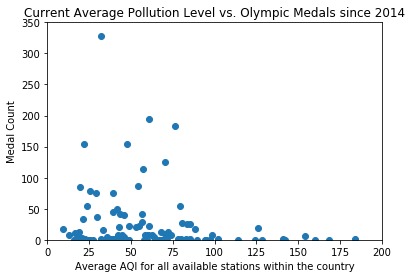

In [25]:
import matplotlib.pyplot as plt

plt.scatter(pollution_df.pollution,pollution_df.MedalCount)
plt.title("Current Average Pollution Level vs. Olympic Medals since 2014")
plt.xlabel("Average AQI for all available stations within the country")
plt.ylabel("Medal Count")
plt.xlim(0,200)
plt.ylim(0,350)

plt.show()

In [26]:
import scipy.stats as sts

coefficient=sts.pearsonr(pollution_df.pollution,pollution_df.MedalCount)[0]
pvalue=sts.pearsonr(pollution_df.pollution,pollution_df.MedalCount)[1]

print(f"The correlation is {round(coefficient,4)} and the p-value is {round(pvalue,4)}")

The correlation is -0.114 and the p-value is 0.2189
